### Code features as listed in this tutorial:
<ol>
    <li>Taking as input material multilayers of any custom lenghts, number of layers, and with any custom indeces of refraction (which can be complex).</li>
    <li>Simulating intensity of reflected light through a multilayer with respect to the incident angle of the inbound light at a set wavelength.</li>
    <li>Simulating intensity of reflected light through a multilayer with respect to the wavelength of the inbound light at a set incident angle.</li>
    <li>Simulating intensity of reflected light through a multilayer with respect to the wavelength of the inbound light at a set incident angle, while using a known relationship between wavelength and index of refraction to adjust the indeces dynamically. (advanced)</li>
    <li>Overview of intensity of reflected or transmitted light through a multilayer simulation options.</li>
    <li>Simulating the electric field through a multilayer at a fixed wavelength and incident angle for the inbound light.</li>
    <li>Practical examples of light intensity and electric field simulations.</li>
    <li>Using the inbuilt graphing methods for electric field simulations.</li>
    <li>Using the inbuilt Bloch Surface Wave detector. (unstable)</li>
    <li>Using the inbuilt Refractive Index Unit (RIU) / Shift With Thickness (SWT) calculators. (unstable)
    <li>Using the inbuilt brute-force multilayer designer. (advanced)(unstable)</li>
</ol>

<p>Let's get started.<br>
Below we will just import the Python modules we need.</p>

In [1]:
# importing the modules which will be used in this tutorial
# the optical_multilayer module itself operates off numpy and matplotlib, 
# but importing these is useful for easily visualizing the generated simulations
# and send input arguments which are more stable for the code to "digest"

import numpy as np
import optical_multilayer as om
import matplotlib.pyplot as plt

# for this to work make sure you have installed these python packages.
# this can be easily done by using the pip command in your terminal
# i.e. "pip install optical_multilayer"
# for additional help you can visit the Python Package Index (PIP) website

The main utility of the program is the simulation of the light intensity and electric field profile accross any user defined multilayers. The code is extremely flexible, and can handle a large array of parameters. This is also arguably its biggest downside, making it slightly convoluted at first.
For this reason, we will attempt to break down each component of the provided functions step by step.

The conceptual difficulty of the physics involved only futher convolutes the process. If you are not familiar with the topics at hand and wish to get an understanding of the physics involved, 

### 1. Taking as input material multilayers of any custom lenghts, number of layers, and with any custom indeces of refraction (which can be complex

To begin with, we will simply look at how to effectively make the variables which will be used to define the various simulation parameters. 
The main multilayer function has a lot of parameters, for now we will simply focus on the basic ones which are required for virtually all simulations.

In [2]:
# The main function with its default arguments is as following:
# om.multilayer(n_list, dist, mode = 'rp', step = 1000, option_aw = 'a', e_opt = 'n',
#               a1 = 0, a2 = np.pi/2, w_t = 650e-9, w1 = 400e-9, w2 = 750e-9,
#               ang = np.pi/3, n_wv_dic = {}, nw_list = [], limit = 1000e-9)

# n_list represents the list of refractive indeces for the mediums considered, in order
# from top to bottom. parsing this number as conmplex even if the complex part is 0 is
# strongly reccomended

# dist is the thicknesses of the multilayers involved, and they need to be two less than 
# the number of mediums specifies with n_list, since the two outside mediums are considered
# infinite

# mode represents the polarisation mode and whether transmission or reflection coefficients 
# are calculated (the difference between them giving the absorption coefficients)
# the first letter stands for (r)eflection or (t)ransmission, and the second letter stands
# for either P(parallel) or S(perpendicular) polarisation

# this is a lot of words, so to visualize it, consider a simple system that has 
# glass on top (n = 1.5, 0.00), Silicon Dioxide (Si02) with n = 1.457, 3.4e-5
# and then a Titanium Dioxie (TiO2) with n = 2.3, 1.5e-4, SiO2 again, TiO2 again, 
# and then with the bottom layer being water (n = 1.33, 0.00)
# Let the thickness of the first layer be 132 nm, the thickness of the 2nd layer be 250 nm, 
# thickness of the 3rd layer be 132 nm again, and the thickness of the final layer be 
# 300 nm. We will calculate the reflection coefficient with P polarized light

# we will use a resolution of 10000 steps for this, which means the simulation will 
# generate a total of 10000 points at which it will evaluate the corresponding coefficients

# the set-up code for this scenario would look like:

index = np.array([complex(1.5, 0.00), complex(1.457, 3.4e-5), complex(2.3, 1.5e-4),
        complex(1.457, 3.4e-5), complex(2.3, 1.5e-4), complex(1.33, 0.00)])
        ### variable defining the indeces of refraction in the system
    
depth = np.array([132e-9, 250e-9, 132e-9, 300e-9])
        ### variable defining the depths of the multilayers in the system

res = 10000
        ### variable giving the "resolution" (or number of simulated points)
    
pol = 'rs'
        ### variable giving whether the simulation shows transmission or reflection
        ### coefficients and the polarisation mode of the light
        ### future versions will support light with mixed polarisation states
        ### the polarisation mode key is:
            ### rs - S-Polarized Inbound to Reflected Light Intensity 
            ### rp - P-Polarized Inbound to Reflected Light Intensity
            ### ts - S-Polarized Inbound to Transmitted Light Intensity 
            ### tp - P-Polarized Inbound to Transmitted Light Intensity
        ### note that this variable *has* to be one of these specific strings
        ### otherwise the code will return an exception
        
# note that the layer variables are defined with np.array, numpy arrays being more efficient
# than classic python lists, and numpy has better complex number support hence avoids some
# weird bugs from arising
# side note: to easily express exponents in python, you can use the "e" symbol in the 
# number, as it can be seen in the definition of the layer depth 

# side note: the thicknesses and refraction coefficients used do not necessarily 
# corellate to any real materials or systems, they were random choices

### 2. Simulating intensity of reflected light through a multilayer with respect to the incident angle of the inbound light at a set wavelength.

We will simply utilize the hyperparameters defined in the section above to do this. Consider a set wavelength of inbound light of 450 nm for this simulation. Our output will be a graph showing the intensity of light reflected out of the system as a function of changing incident angle. The code is as follows:

In [3]:
wave = 450e-9
    ### variable defining the incident wavelength of light
    
a1 = 0
    ### angle of incident light at which the simulation starts
a2 = np.pi/2 
    ### angle of incident light at which the simulation ends
    ### note that this has to be in radians
    
output = om.multilayer(index, depth, mode = pol, step = res, option_aw = 'a',
               a1 = a1, a2 = a2, w_t = wave)
    ### the simulation should run fairly quickly with a res of only 10000 steps
    ### however, this time can increase significantly depending on your machine
    ### if a large number of steps is chosen
    ### additionaly, note that the w_t variable gives the constant wavelength at which we
    ### wish the simulation to run
    ### additionally, note the "option_aw" parameter. this one determines whether or not
    ### the simulation runs with respect to changing angle or changing wavelength
    ### the default is set to changing angle, but it is always good to specify it

In [4]:
# let us now investigate what the function *actually* returns
output

array([[0.00000000e+00+0.j, 2.40189484e-01+0.j],
       [1.57079633e-04+0.j, 2.40189490e-01+0.j],
       [3.14159265e-04+0.j, 2.40189507e-01+0.j],
       ...,
       [1.57032509e+00+0.j, 9.99996624e-01+0.j],
       [1.57048217e+00+0.j, 9.99997749e-01+0.j],
       [1.57063925e+00+0.j, 9.99998875e-01+0.j]])

C:\Users\nilay\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


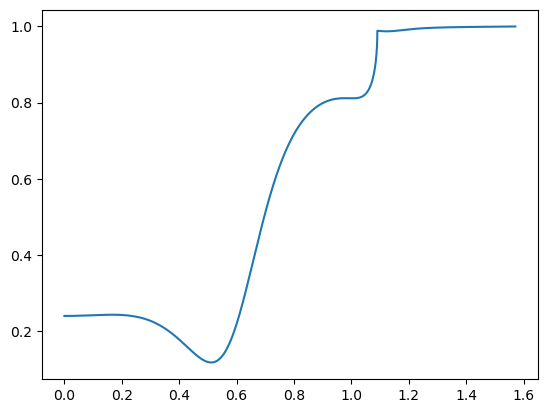

In [5]:
# as you can see, the returned output is a numpy array itself
# it is hard to really understand its meaning by just looking at it,
# but we can see that it has 2 columns, which means we can make a
# 2D graph of the data it represents. let's use matplotlib to do so

plt.plot(output[:,0], output[:,1])

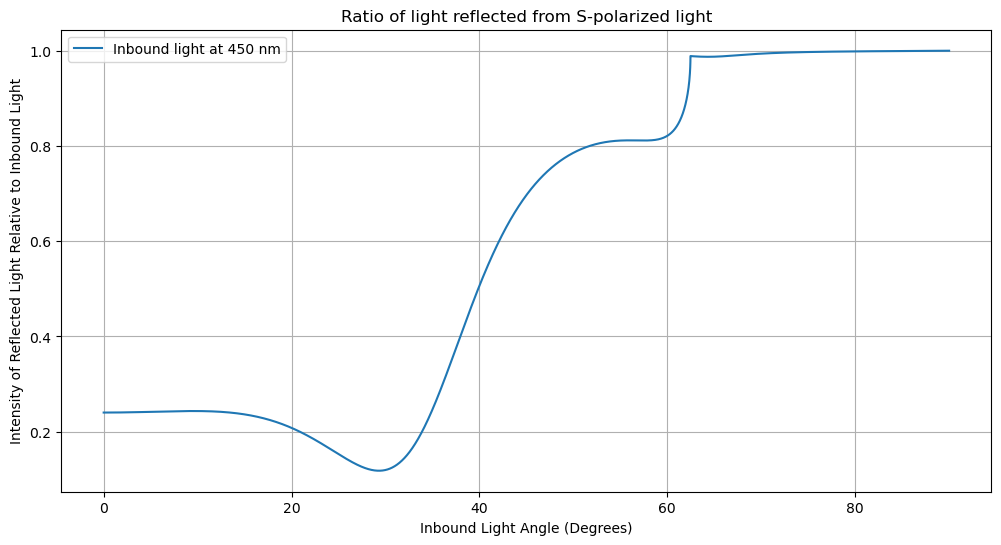

In [6]:
# the output is a graph that shows the intensity of the reflected light, relative to the 
# inclination of the inbound light
# we can see from this that past a specific angle, we see total internal reflection

# now, let's make a nicer graph, with a x-axis in degrees

angles = output[:,0] * (180/np.pi)
intensity = output[:,1]

fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(angles, intensity, label = "Inbound light at 450 nm")
plt.title("Ratio of light reflected from S-polarized light")
plt.xlabel("Inbound Light Angle (Degrees)")
plt.ylabel("Intensity of Reflected Light Relative to Inbound Light")
plt.legend()
plt.grid()
plt.show()

We have now succesfully simulated the amount of light reflected out of an optical multilayer with respect to diferent inbound angles!

### 3. Simulating intensity of reflected light through a multilayer with respect to the wavelength of the inbound light at a set incident angle.

This process will be extremely similar to the fixed wavelength one. The same hyperparameters (layer depths, medium indeces, light polarisation and reflection) will be used from now on unless otherwise specified.

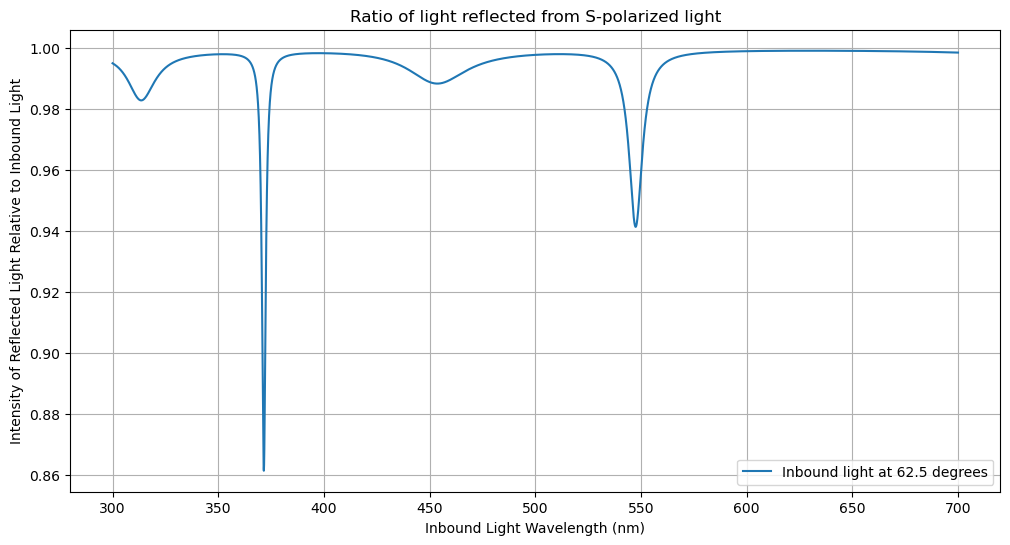

In [7]:
w1 = 300e-9
    ### starting wavelength of simulation at 300 nm
w2 = 700e-9
    ### ending wavelength of simulation at 700 nm
ang = 62.5 * np.pi/180
    ### fixed angle of simulation, note that we must make sure that it is in radians

output = om.multilayer(index, depth, mode = pol, step = res, option_aw = 'w',
               w1 = w1, w2 = w2, ang = ang)

fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(output[:,0] * 10e8, output[:,1], label = "Inbound light at 62.5 degrees")
plt.title("Ratio of light reflected from S-polarized light")
plt.xlabel("Inbound Light Wavelength (nm)")
plt.ylabel("Intensity of Reflected Light Relative to Inbound Light")
plt.legend()
plt.grid()
plt.show()

### 4. Simulating intensity of reflected light through a multilayer with respect to the wavelength of the inbound light at a set incident angle, while using a known relationship between wavelength and index of refraction to adjust the indeces dynamically. (advanced)

In reality, indeces of refraction are not constant. There is an inbuilt functionality in the code which automatically adjusts the indeces of refraction of the mediums, given that each index of refraction can be expressed in the form of a formula which depends solely on the wavelength of incident light.

This works only when using a fixed angle of incidence with variable wavelength.

We will use Python dictionaries for this, and have to define our own index of refraction functions.

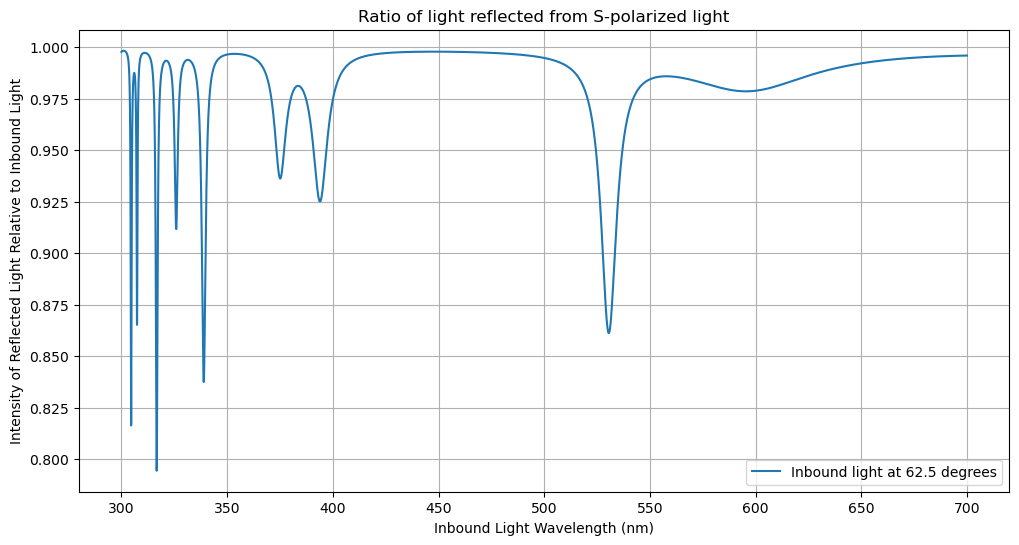

In [8]:
# we will use the same wavelength range and fixed angle as in the section before

# to start easy, we will first define the index functions for glass and water, because
# their indeces will simply be constant

def glass(lmbd):
    return complex(1.5,0)
def water(lmbd):
    return complex(1.33,0)
# the function needs to take a wavelength in meters as input, and return the 
# index of refraction as a complex number

# now for the more complex equations for materials Si02 and TiO2, these will be:

def tio2(lmbd):
    lmbd0 = lmbd * (10 ** (6))
    out = complex(np.sqrt(5.913 + (0.2441) / (-0.0803 + lmbd0 ** 2)), 0.0007)
    return out
           
def sio2(lmbd):
    lmbd0 = lmbd * (10 ** (6))
    a = (0.6961663 * (lmbd0 ** 2)) / ((lmbd0 ** 2) - (0.0684043 ** 2))
    b = (0.4079462 * (lmbd0 ** 2)) / ((lmbd0 ** 2) - (0.1162414 ** 2))
    c = (0.8974794 * (lmbd0 ** 2)) / ((lmbd0 ** 2) - (9.896161 ** 2))
    out = complex(np.sqrt(a + b + c + 1), 0.0001)
    return out

# a lot of index of refraction equations use wavelength in terms of microns, but the 
# input has to be in meters, so if that is the case we have to convert in the functions
# the wavelength from meters to microns

# now for the more complicated aspect of this, we will create a dispatch list and
# the function dictionary

# the function dictionary will simply assign a string value to each function, so that
# it can be easily parsed through the main function
func_dic = {'glass': glass, 'tio2': tio2, 'sio2': sio2, 'water': water}

# the dispatch list will indicate the order in which the main function needs to call
# index of refraction functions from the function dictionary
dispatch_list = ['glass', 'tio2', 'sio2', 'tio2', 'sio2', 'water']

# now to actually run the simulation...

output = om.multilayer(index, depth, mode = pol, step = res, option_aw = 'w',
               w1 = w1, w2 = w2, ang = ang, n_wv_dic = func_dic, nw_list = dispatch_list)
        ### n_wv_dic is the dictionary variable in the main function. it is empty by
        ### default, and if the function is parsed through with it empty, the code knows 
        ### we are not using dynamic indeces. nw_list is the function dispatch list

fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(output[:,0] * 10e8, output[:,1], label = "Inbound light at 62.5 degrees")
plt.title("Ratio of light reflected from S-polarized light")
plt.xlabel("Inbound Light Wavelength (nm)")
plt.ylabel("Intensity of Reflected Light Relative to Inbound Light")
plt.legend()
plt.grid()
plt.show()

### 5. Overview of intensity of reflected or transmitted light through a multilayer simulation options.

We have investigated the what can be considered the "core" of this module, the light intensity calculations. Below is a reiteration of what each individual parameter we have talked about so far means:

* n_list - a numpy array which gives the indeces of refraction for the mediums in the system, starting with the medium from which the light is incident to the medium to which the light is transmitted to
* dist - a numpy array which gives the thickness (in meters) for all the layers in the system, following the same order as *n_list*
* mode - a string statement that indicates the polarisation of the inbound light and whether reflection or transmission coefficients are calculated, the possible options being 'rs' (S-polarized reflection), 'rp' (P-polarized reflection), 'ts' (S-polarised reflection), 'tp' (P-polarised reflection)
* step - an integer which gives the "resolution" of the simulation; the number of points which will be generated at even increments over the respective range
* option_aw - a string which tells the code whether angle or the wavelength is the x-axis, set to 'a' for angle and 'w' for wavelength
* a1 - if option_aw == 'a', a real number which represents the start angle of incidence 
* a2 - if option_aw == 'a', a real number which represents the stop angle of incidence
* w_t - if option_aw == 'a', a rational number which represents the wavelength of incident light
* w1 - if option_aw == 'w', a rational number which represents the start wavelength of incident light
* w2 - if option_aw == 'w', a rational number which represents the stop wavelength of incident light
* ang - if option_aw == 'w', a real number which represents the angle of incidence
* n_wv_dic - a dictionary which contains functions that calculate the index of refraction of materials of the system, with respect to the inbound wavelength; can only be used if option_aw == 'w' and code will use the static indeces given by n_list if n_wv_dic is empty
* nw_list - a list with strings which are in the order of the mediums in the system, corresponding to the respective functions in n_wv_dic 

### 6. Simulating the electric field through a multilayer at a fixed wavelength and incident angle for the inbound light.

The om.multilayer function is also capable of calculating the electric field through a material for a fixed angle of incidence and wavelength. This creates data which represents depth into the multilayer system versus relative e-field intensity.

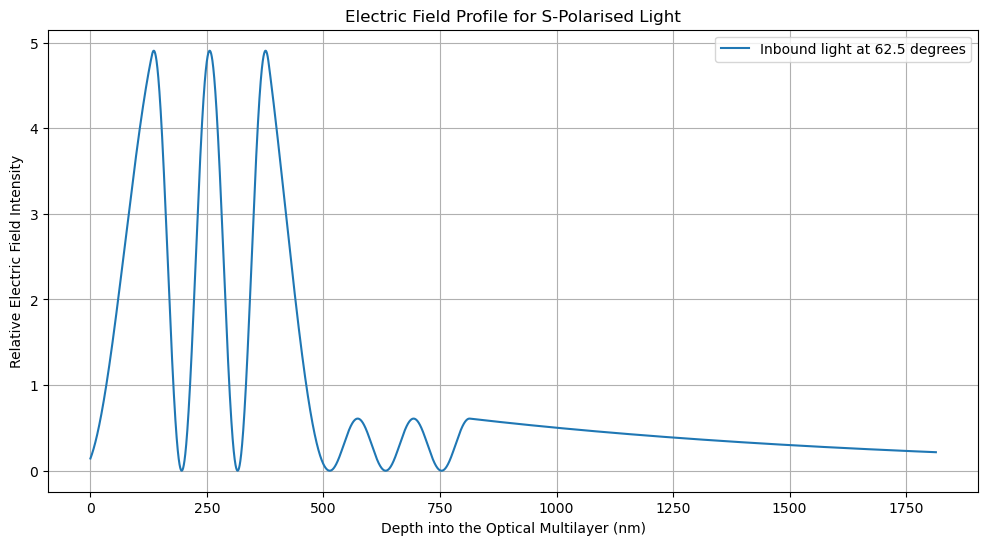

In [9]:
# we will use the same hyperparameters, simulating the e-field through the previously 
# designed system with 450 light incident at 62.5 degrees 

efield_limit = 100 * 10e-9
    # this is how much futher past the final layer in the system the electric field will
    # be simulated to, in nanometers
    
output = om.multilayer(index, depth, mode = pol, step = res, 
                    e_opt = 'y', w_t = wave, ang = ang, 
                    limit = efield_limit)
    # using the same hyperparameters as before, with fixed angles and wavelenghts
    # the variable e_opt has to be set to the string 'yes', since this is what signals
    # the code to make an electric field simulation instead of reflection/transmission
    
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(output[:,0] * 10e8, output[:,1], label = "Inbound light at 62.5 degrees")
plt.title("Electric Field Profile for S-Polarised Light")
plt.xlabel("Depth into the Optical Multilayer (nm)")
plt.ylabel("Relative Electric Field Intensity")
plt.legend()
plt.grid()
plt.show()

### 7. Practical examples of light intensity and electric field simulations.

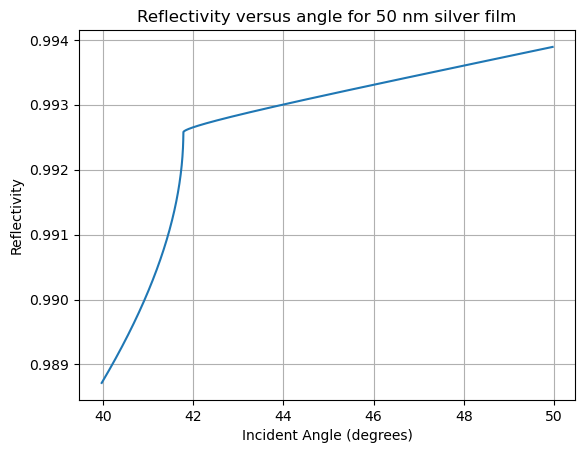

In [10]:
# Simulation of the reflectivity versus angle of a 50 nm silver film
# in a prism/silver/air configuration

index = np.array([complex(1.5,0.0), complex(0.03,4.24),complex(1.0,0.0)])
thickness = np.array([complex(50e-9,0.0)])

angstart = 40*(np.pi/180)
angend = 50*(np.pi/180)

R = om.multilayer(index, thickness, mode = pol, step = 5000, option_aw = 'a', e_opt = 'n',
               a1 = angstart, a2 = angend, w_t = 650e-9, w1 = 400e-9, w2 = 750e-9,
               ang = np.pi/3, n_wv_dic = {}, nw_list = [], limit = 1000e-9)

plt.plot(R[:,0]*57.2598,R[:,1])
plt.xlabel('Incident Angle (degrees)')
plt.ylabel('Reflectivity')
plt.title('Reflectivity versus angle for 50 nm silver film')
plt.grid()
plt.show()

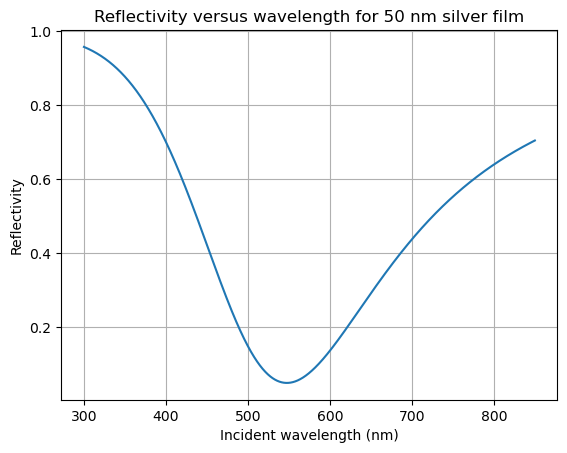

In [11]:
# Simulation of the reflectivity versus wavelength of a 50 nm silver film
# in a prism/silver/air configuration


angle = 43.35*(np.pi/180)
W = om.multilayer(index, thickness, mode = 'rp', step = 5000, option_aw = 'w', e_opt = 'n',
               a1 = np.pi/6, a2 = np.pi/2, w_t = 650e-9, w1 = 300e-9, w2 = 850e-9,
               ang = angle, n_wv_dic = {}, nw_list = [], limit = 1000e-9)

plt.plot(W[:,0]*1e9,W[:,1])
plt.xlabel('Incident wavelength (nm)')
plt.ylabel('Reflectivity')
plt.title('Reflectivity versus wavelength for 50 nm silver film')
plt.grid()
plt.show()

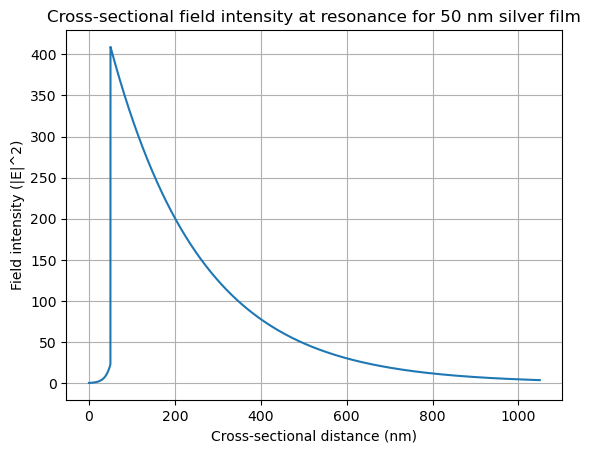

In [12]:
# Simulation of cross-sectional electromagnetic field intensity (e_opt = 'y') for 50 nm
# silver film. The calculation is done at 650 nm at the resonant angle for surface
# plasmon generation as determined in the first plot.

Ef = om.multilayer(index, thickness, mode = 'rp', step = 5000, option_aw = 'w', e_opt = 'y',
               a1 = np.pi/6, a2 = np.pi/2, w_t = 650e-9, w1 = 300e-9, w2 = 850e-9,
               ang = angle, n_wv_dic = {}, nw_list = [], limit = 1000e-9)

plt.plot(Ef[:,0]*1e9,Ef[:,1])
plt.xlabel('Cross-sectional distance (nm)')
plt.ylabel('Field intensity (|E|^2)')
plt.title('Cross-sectional field intensity at resonance for 50 nm silver film')
plt.grid()
plt.show()

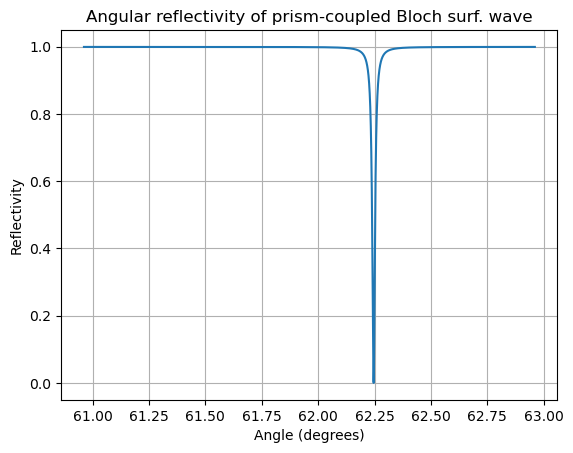

In [13]:
# Bloch surface wave simulation for a SiO2/TiO2 multilayer.

ntio = np.sqrt(4.84+0.0007*1j)
nsio = np.sqrt(2.1316+0.0001*1j)
dtio = complex(121e-9,0)
dsio = complex(188e-9,0)
ddefect= complex(410e-9,0)

indexB = np.array([complex(1.5,0),ntio,nsio,ntio,nsio,ntio,nsio,ntio,nsio,complex(1.0,0)])
thicknessB = np.array([dtio,dsio,dtio,dsio,dtio,dsio,dtio,ddefect])
angstart=61*(np.pi/180)
angend=63*(np.pi/180)

RBSW = om.multilayer(indexB, thicknessB, mode = 'rs', step = 10000, option_aw = 'a', e_opt = 'n',
               a1 = angstart, a2 = angend, w_t = 650e-9, w1 = 400e-9, w2 = 750e-9,
               ang = np.pi/3, n_wv_dic = {}, nw_list = [], limit = 1000e-9)

plt.plot(RBSW[:,0]*57.2598,RBSW[:,1])
plt.xlabel('Angle (degrees)')
plt.ylabel('Reflectivity')
plt.title('Angular reflectivity of prism-coupled Bloch surf. wave')
plt.grid()
plt.show()

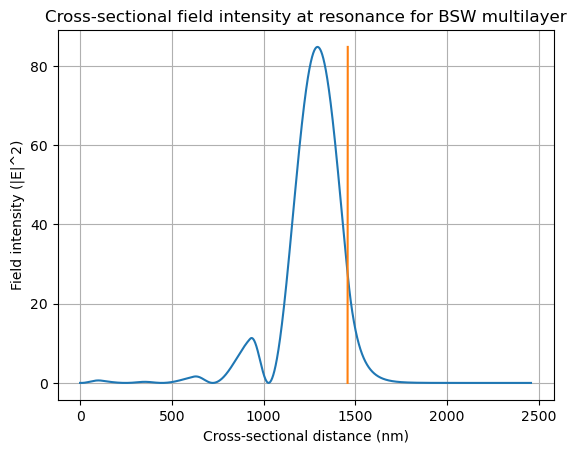

In [14]:
# BSW Field profile. The cross-sectional EM filed intensity is plotted at the resonant angle
# found in the previous plot. Note that the field is normalized to E=1 in the initial medium.

angleB = 62.25*(np.pi/180)

EfBSW = om.multilayer(indexB, thicknessB, mode = 'rs', step = 10000, option_aw = 'w', 
                      e_opt = 'y', a1 = np.pi/6, a2 = np.pi/2, w_t = 650e-9, 
                      w1 = 300e-9, w2 = 850e-9, ang = angleB, n_wv_dic = {}, nw_list = [], 
                      limit = 1000e-9)

Ind = np.round(np.sum(thicknessB)*1e9)
xplot = np.array([Ind,Ind+1])
ymax=np.max(EfBSW[:,1])
yplot=np.array([0,ymax])

plt.plot(EfBSW[:,0]*1e9,EfBSW[:,1])
plt.plot(xplot,yplot)
plt.xlabel('Cross-sectional distance (nm)')
plt.ylabel('Field intensity (|E|^2)')
plt.title('Cross-sectional field intensity at resonance for BSW multilayer')
plt.grid()
plt.show()

### 8. Using the inbuilt graphing methods for electric field simulations.

The om module comes with a bootstrap function which uses matplotlib to graph the results for both reflection/transmission simulations and also e-field profiles. It is specifically built to handle multiple sets of simulations, so it is particularly useful if you wish to quickly see a large set of pre-run simulations.

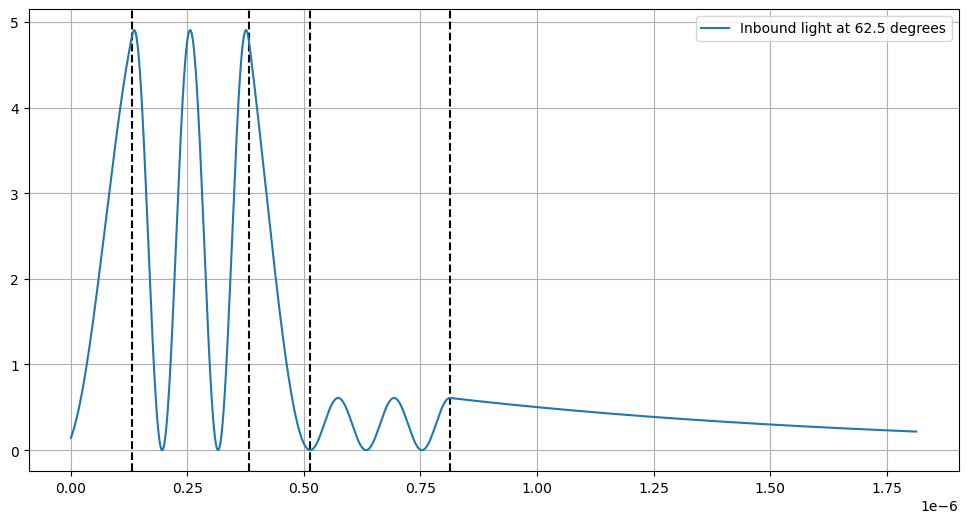

In [15]:
### we will graph a single e-field simulation, using the one previously generated
### in section 6. 
### this is the function:
### om.graph(coord_list, label_list, size = (12, 6), efield = 0, d_set = None)

fields = [output]
    # this variable represents the output variables for the ran simulations
labels = ["Inbound light at 62.5 degrees"]
    # this variable represents the legend which will be given to the respective simulation
d_set = [depth]
    # this variable represents the multilayer width variable for the respective graph
    
### all of these variables are simply indexed into through a for loop, so the first field
### output corresponds to the first label string and to the first depth list, and so on

om.graph(fields, labels, size = (12, 6), efield = 1, d_set = d_set)

### the size of the graph change be changed by simply adjusting the size argument
### which is by default in inches
### this function can also graph normal reflection/transmission simulations,
### this being specified by having efield = 0. in this case d_set should be left 
### unspecified, since there is no ned to graph layer boundary lines

### 9. Using the inbuilt Bloch Surface Wave detector. (unstable)

The functionalities discussed from here on out have worked in the vast majority of investigated test cases; however, due to the nature of the way they are currently implemented there is a degree of uncertainty in their reliability. 

The following function automatically detects whether or not a specific simulation contains a Bloch Surface Wave, and if it does contain any it will return the positional arguments for them.

In [16]:
### This is the Bloch Surface Wave detector function with its default parameters:
    ### om.bloch_wave(n_list, d, mode = 'rp', step = 1000, option_aw = 'a', a1 = 0,
            ### a2 = np.pi/2, w_t = 623.8e-9, w1 = 400e-9, w2 = 750e-9, 
            ### ang = np.pi/3, roof = 0.98, minimal = 0.6, perc_trav = 0.01, verb = 0):
### Many of these parameters imitate the structuring of the main om function, however there
### are a few extra specifically for defining when a bloch surface wave should be detected.

### roof gives the minimum reflection needed to be reached for a region to be considered 
### one in which Bloch Surface Waves will be searched for. 

### minimal gives the minimal reflectivity to be observed for a Bloch Surface Wave
### in a region to be detected 

### perc_trav represents the minimum percent of the total steps in a simulation that a 
### specific bandgap region must take up for it to be considered a bandgap within which
### Bloch Surface Waves will be searched for

### verb represents the verbosity of the function. if verb is set to 0, the function will
### give no messages, returning just the outputs. if verb is set to 1, the function will
### give a message on whether valid bandgaps are found, and then on whether or not 
### any Bloch Surface Waves are found. if a valid BSW is found, with verb = 1, the function
### will return information about where it was detected

### important note: a system which would have a BSW in reality might not show it in the 
### simulation if the resolution/stepsize is not high enough. some previously tested systems
### requiring as many as 100000 steps to proerply display a BSW

### using one of the practical examples system which does exhibit a BSW:

ntio = np.sqrt(4.84+0.0007*1j)
nsio = np.sqrt(2.1316+0.0001*1j)
dtio = complex(121e-9,0)
dsio = complex(188e-9,0)
ddefect= complex(410e-9,0)

indexB = np.array([complex(1.5,0),ntio,nsio,ntio,nsio,ntio,nsio,ntio,nsio,complex(1.0,0)])
thicknessB = np.array([dtio,dsio,dtio,dsio,dtio,dsio,dtio,ddefect])
angstart=61*(np.pi/180)
angend=63*(np.pi/180)

pos, region, low = om.bloch_wave(indexB, thicknessB, mode = 'rs', step = 100000, option_aw = 'a', 
                       a1 = 0, a2 = np.pi/2, w_t = 650e-9, roof = 0.96, minimal = 0.3,
                       perc_trav = 0.01, verb = 1)

print(pos, region, low)

### pos represents the positions (step-wise) in the simulation where the BSW 
### minimas are found

### region represents the positions (step-wise) that give the widths of the BSW minimas

### low represents the respective reflectivity minimas hit by each BSW 

Bloch surface wave between points 69168 and 69244 with a mininum of (0.0007039111230910246+0j) found.
[69205] [69168, 69244] [(0.0007039111230910246+0j)]


### 10. Using the inbuilt Refractive Index Unit (RIU) / Shift With Thickness (SWT) calculators. (unstable) 

This function can quickly calculate the RIU and SWT values for a specific system. SWT is a new sensibility metric we introduced, which more directly corresponds to real life applications of Bloch Surface Waves, and gives a measurement of sensibility in change of a shift with system thickness as opposed to a change in refractive index. SWT is either the absolute angular or the absolute wavelength shift when 10 nanometers are added to the thickness of the bottom layer of the system. Through brief testing of multiple systems, it was found that SWT and RIU shifts are roughly similar within a rang eof 10 nanometers and 0.01 of a refractive index, respectively.

This function is considered unstable solely because it relies on the BSW detector function to find the Bloch Surface Waves within these systems and then calculate the shift observed when the respective systems parameters are altered. Additionally, note that for some system which contain BSW, the function might fail to calculate one or both of these values, due to the BSW existing at the very edge on the bandgap, and so when the system is altered it dissapears. 

In [17]:
### Both of the calculator functions use very similar syntax to the main om function.
### They are shown below:

### om.riu_calc(n_list, d_list, pol, steps, change = 'a', a_i = 0, a_f = np.pi/2, 
            ### w_c = 623.8e-9, w_i = 400e-9, w_f = 750e-9, a_c = np.pi/3, verb = 0)

### om.swt_calc(n_list, d_list, pol, steps, change = 'a', a_i = 0, a_f = np.pi/2, 
            ### w_c = 623.8e-9, w_i = 400e-9, w_f = 750e-9, a_c = np.pi/3, verb = 0)
    
### For both of these functions, if verb = 0 no return messages will be sent, solely the
### return value from the system will be saved to the coresponding variable.
### If verb = 1, then the function will return a message for each detected BSW, giving 
### its respective SWT or RIU value. 

### The system used in the BSW Detector scenario will be reused here.

riu = om.riu_calc(indexB, thicknessB, pol = 'rs', steps = 100000, verb = 1)
swt = om.swt_calc(indexB, thicknessB, pol = 'rs', steps = 100000, verb = 1)

print(riu)
print(swt)

The degrees per RIU for this design is: 3.5999999999999996
The degrees per SWT for this design is: 0.35459999999999997
3.5999999999999996
0.35459999999999997


### 11. Using the inbuilt brute-force multilayer designer. (advanced)(unstable)

With these generated tools, an algorithm to try to design an optical multilayer which results in the "sharpest" BSW occurences can be created. The current algorithm is very much a brute-force one, where it really just explores the parameter space for us, without any smart techniques. It is going to return the optical multilayer that exhibits the deepest and most fine Bloch Surface Wave for a specific given wavelength. 

[1]: <https://pypi.org/project/optical-multilayer/> "Python Package Index Page"

In [ ]:
### This is multilayer explore function with its default arguments

### om.multilayer_explore(n_list, pol, steps, change = 'a', a_i = 0, 
            ### a_f = np.pi/2, w_c = 623.8e-9, w_i = 400e-9, w_f = 750e-9, 
            ### a_c = np.pi/3, def_ext = 400e-9, nm_ext = 500e-9, incr = 1, low = 0.4, 
            ### riu_set = 'no', riu_cond = 3, swt_set = 'no', swt_cond = 0.3, verb = 0)
            
### A lot of these arguments follow the structure and nomenclature of the previous functions

### The algorithm works by creating new multilayers within a set of width parameters and 
### and finds the configurations with BSWs and reports where these take place, returing 
### as the first argument a list of depth lists for valid BSW, and as the second argument
### the corresponding BSW minimas for these systems 

### The total number of runs should be (def_ext * nm_ext * nm_ext) / incr ** 3

### Returns, in order, a list with lists of widths for the layer, a list with values for
### the minimums observed, and the minimum value observed, the indexes matching for
### all of them. 

### If riu_set/swt_set are initialized as 'yes', the code will also filter out multilayers
### based on their RIU/SWT values. It will first check if a multilayer achieves the 
### minimum desired, and then it will check the RIU/SWT minimum conditions. 
### which are set by riu_cond and swt_cond. If RIU/SWT are turned on and
### verbosity is 1 or 2, the code will also give the calculated RIU/SWT
### values for the respective multilayers. 

n_list = np.array([complex(1.5, 0), complex(2.3, 1.5e-4), complex(1.46, 3.4e-5),
                  complex(2.3, 1.5e-4), complex(1.46, 3.4e-5),
                  complex(2.3, 1.5e-4), complex(1.46, 3.4e-5),
                  complex(2.3, 1.5e-4), complex(1.46, 3.4e-5), complex(1.334)])

crit_ang = np.arcsin(n_list[-1] / n_list[0]) - 0.05

d_set, coord_set = om.multilayer_explore(n_list, 'rs', 30000, change = 'a', 
                        a_i = crit_ang, a_f = np.pi/2, w_c = 650e-9, w_i = 400e-9, 
                        w_f = 750e-9, a_c = (60 * np.pi/180), def_ext = 50e-9,
                        nm_ext = 100e-9, incr = 10, low = 0.2,
                        riu_set = 'yes', riu_cond = 1, swt_set = 'yes', 
                        verb = 2)

print(d_set, coord_set)

A total of (500000.0, 0) layers expected to be explored.
Starting incremental parameter exploration...


C:\Users\nilay\DataspellProjects\BugTracker\optical_multilayer.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  riu = float(diff / 0.01)
C:\Users\nilay\DataspellProjects\BugTracker\optical_multilayer.py:442: ComplexWarning: Casting complex values to real discards the imaginary part
  swt = float(diff)
